In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
data = pd.read_excel('Data_Train (1).xlsx')

In [4]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,17.74


In [5]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [6]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,5977.000000,6019.000000
mean,2013.358199,58738.380296,5.278735,9.479468
std,3.269742,91268.843206,0.808840,11.187917
min,1998.000000,171.000000,0.000000,0.440000
25%,2011.000000,34000.000000,5.000000,3.500000
50%,2014.000000,53000.000000,5.000000,5.640000
75%,2016.000000,73000.000000,5.000000,9.950000
max,2019.000000,6500000.000000,10.000000,160.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 611.3+ KB


In [9]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [10]:
data['Mileage'] = data['Mileage'].apply(lambda x: re.sub('[$kmpl|km/kg]','',str(x)))
data['Engine'] = data['Engine'].apply(lambda x: re.sub('[$CC]','',str(x)))
data['Power'] = data['Power'].apply(lambda x: re.sub('[$bhp]','',str(x)))

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5,17.74


In [11]:
data['Mileage'] = pd.to_numeric(data['Mileage'],errors='coerce')
data['Engine'] = pd.to_numeric(data['Engine'],errors='coerce')
data['Power'] = pd.to_numeric(data['Power'],errors='coerce')

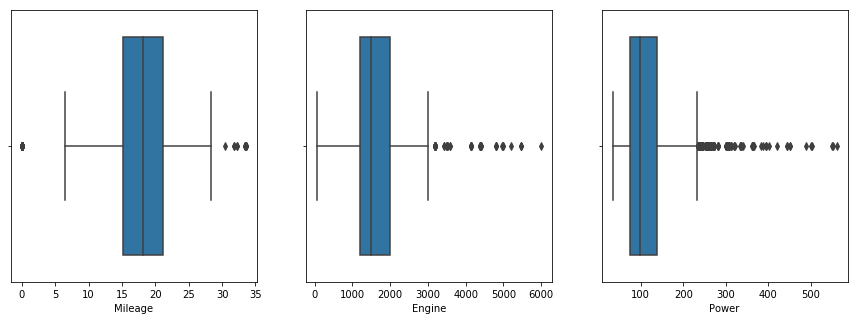

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data['Mileage'])

plt.subplot(1,3,2)
sns.boxplot(data['Engine'])

plt.subplot(1,3,3)
sns.boxplot(data['Power'])
plt.show()

In [13]:
data['Mileage'].median(),data['Engine'].median(),data['Power'].median(),data['Seats'].median()

(18.15, 1493.0, 97.7, 5.0)

In [14]:
data['Mileage'].fillna(data['Mileage'].median(),inplace=True)
data['Engine'].fillna(data['Engine'].median(),inplace=True)
data['Power'].fillna(data['Power'].median(),inplace=True)
data['Seats'].fillna(data['Seats'].median(),inplace=True)

In [15]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [16]:
data['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [17]:
loc_dict={'Mumbai':0, 'Pune':1, 'Chennai':2, 'Coimbatore':3, 'Hyderabad':4, 'Jaipur':5,
       'Kochi':6, 'Kolkata':7, 'Delhi':8, 'Bangalore':9, 'Ahmedabad':10}

In [ ]:
data['Location'] = pd.Series([loc_dict[data['Location'][i]] for i in range(len(data['Location']))])


data.head()